### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lode Dataset

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

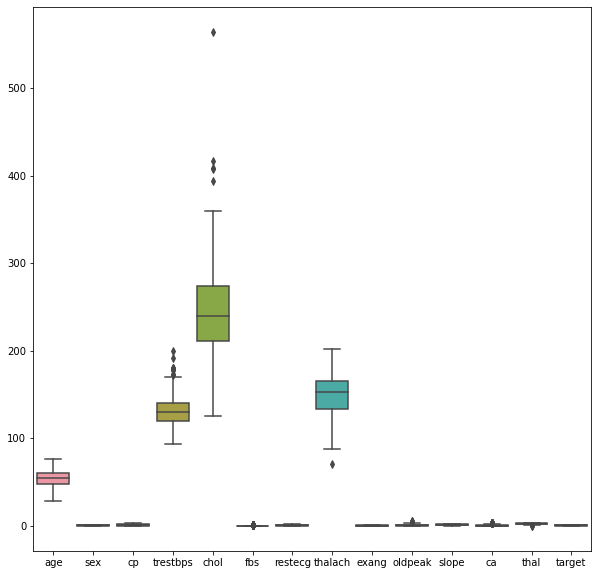

In [8]:
#outliers

plt.figure(figsize = (10,10))
ax = sns.boxplot(data=dataset)

In [9]:
# to read and remove outlires
from scipy import stats
z = np.abs(stats.zscore(dataset))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


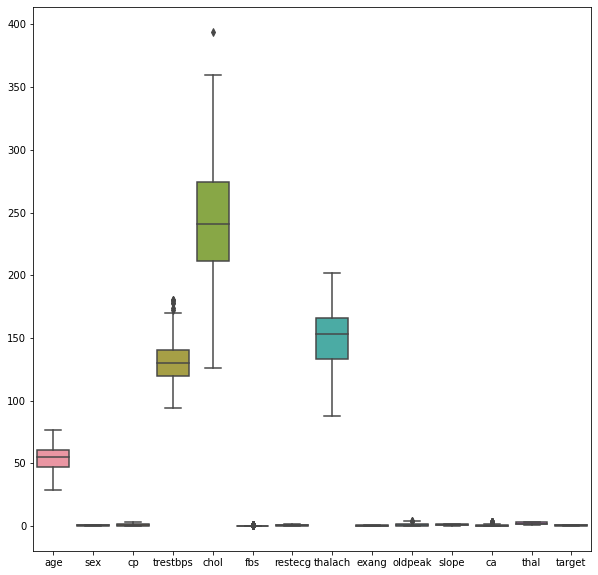

In [10]:

filtered_entries = (z < 3).all(axis=1)
df = dataset[filtered_entries]


plt.figure(figsize = (10,10))
ax = sns.boxplot(data=df)

In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Define X and y

In [12]:
X = dataset.drop('target',axis = 1)

In [13]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
y = dataset['target']

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Scale Dataset

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std = StandardScaler()

In [18]:
Standard_new =  std.fit_transform(X)

In [19]:
Standard_new

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

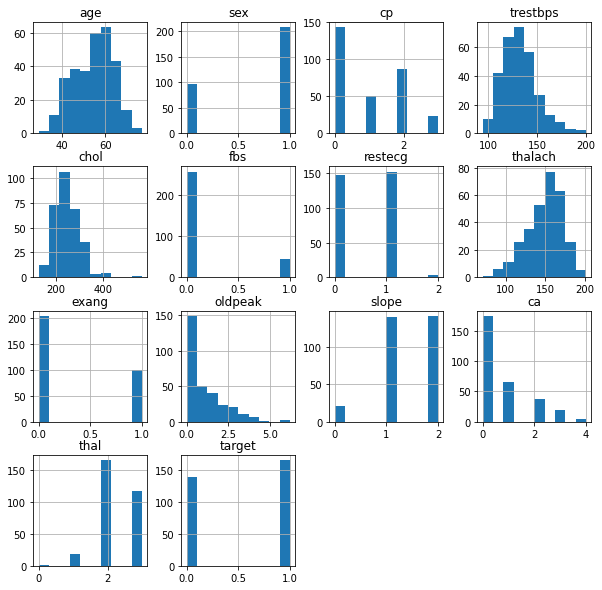

In [20]:
dataset.hist(figsize=(10,10))
plt.show()

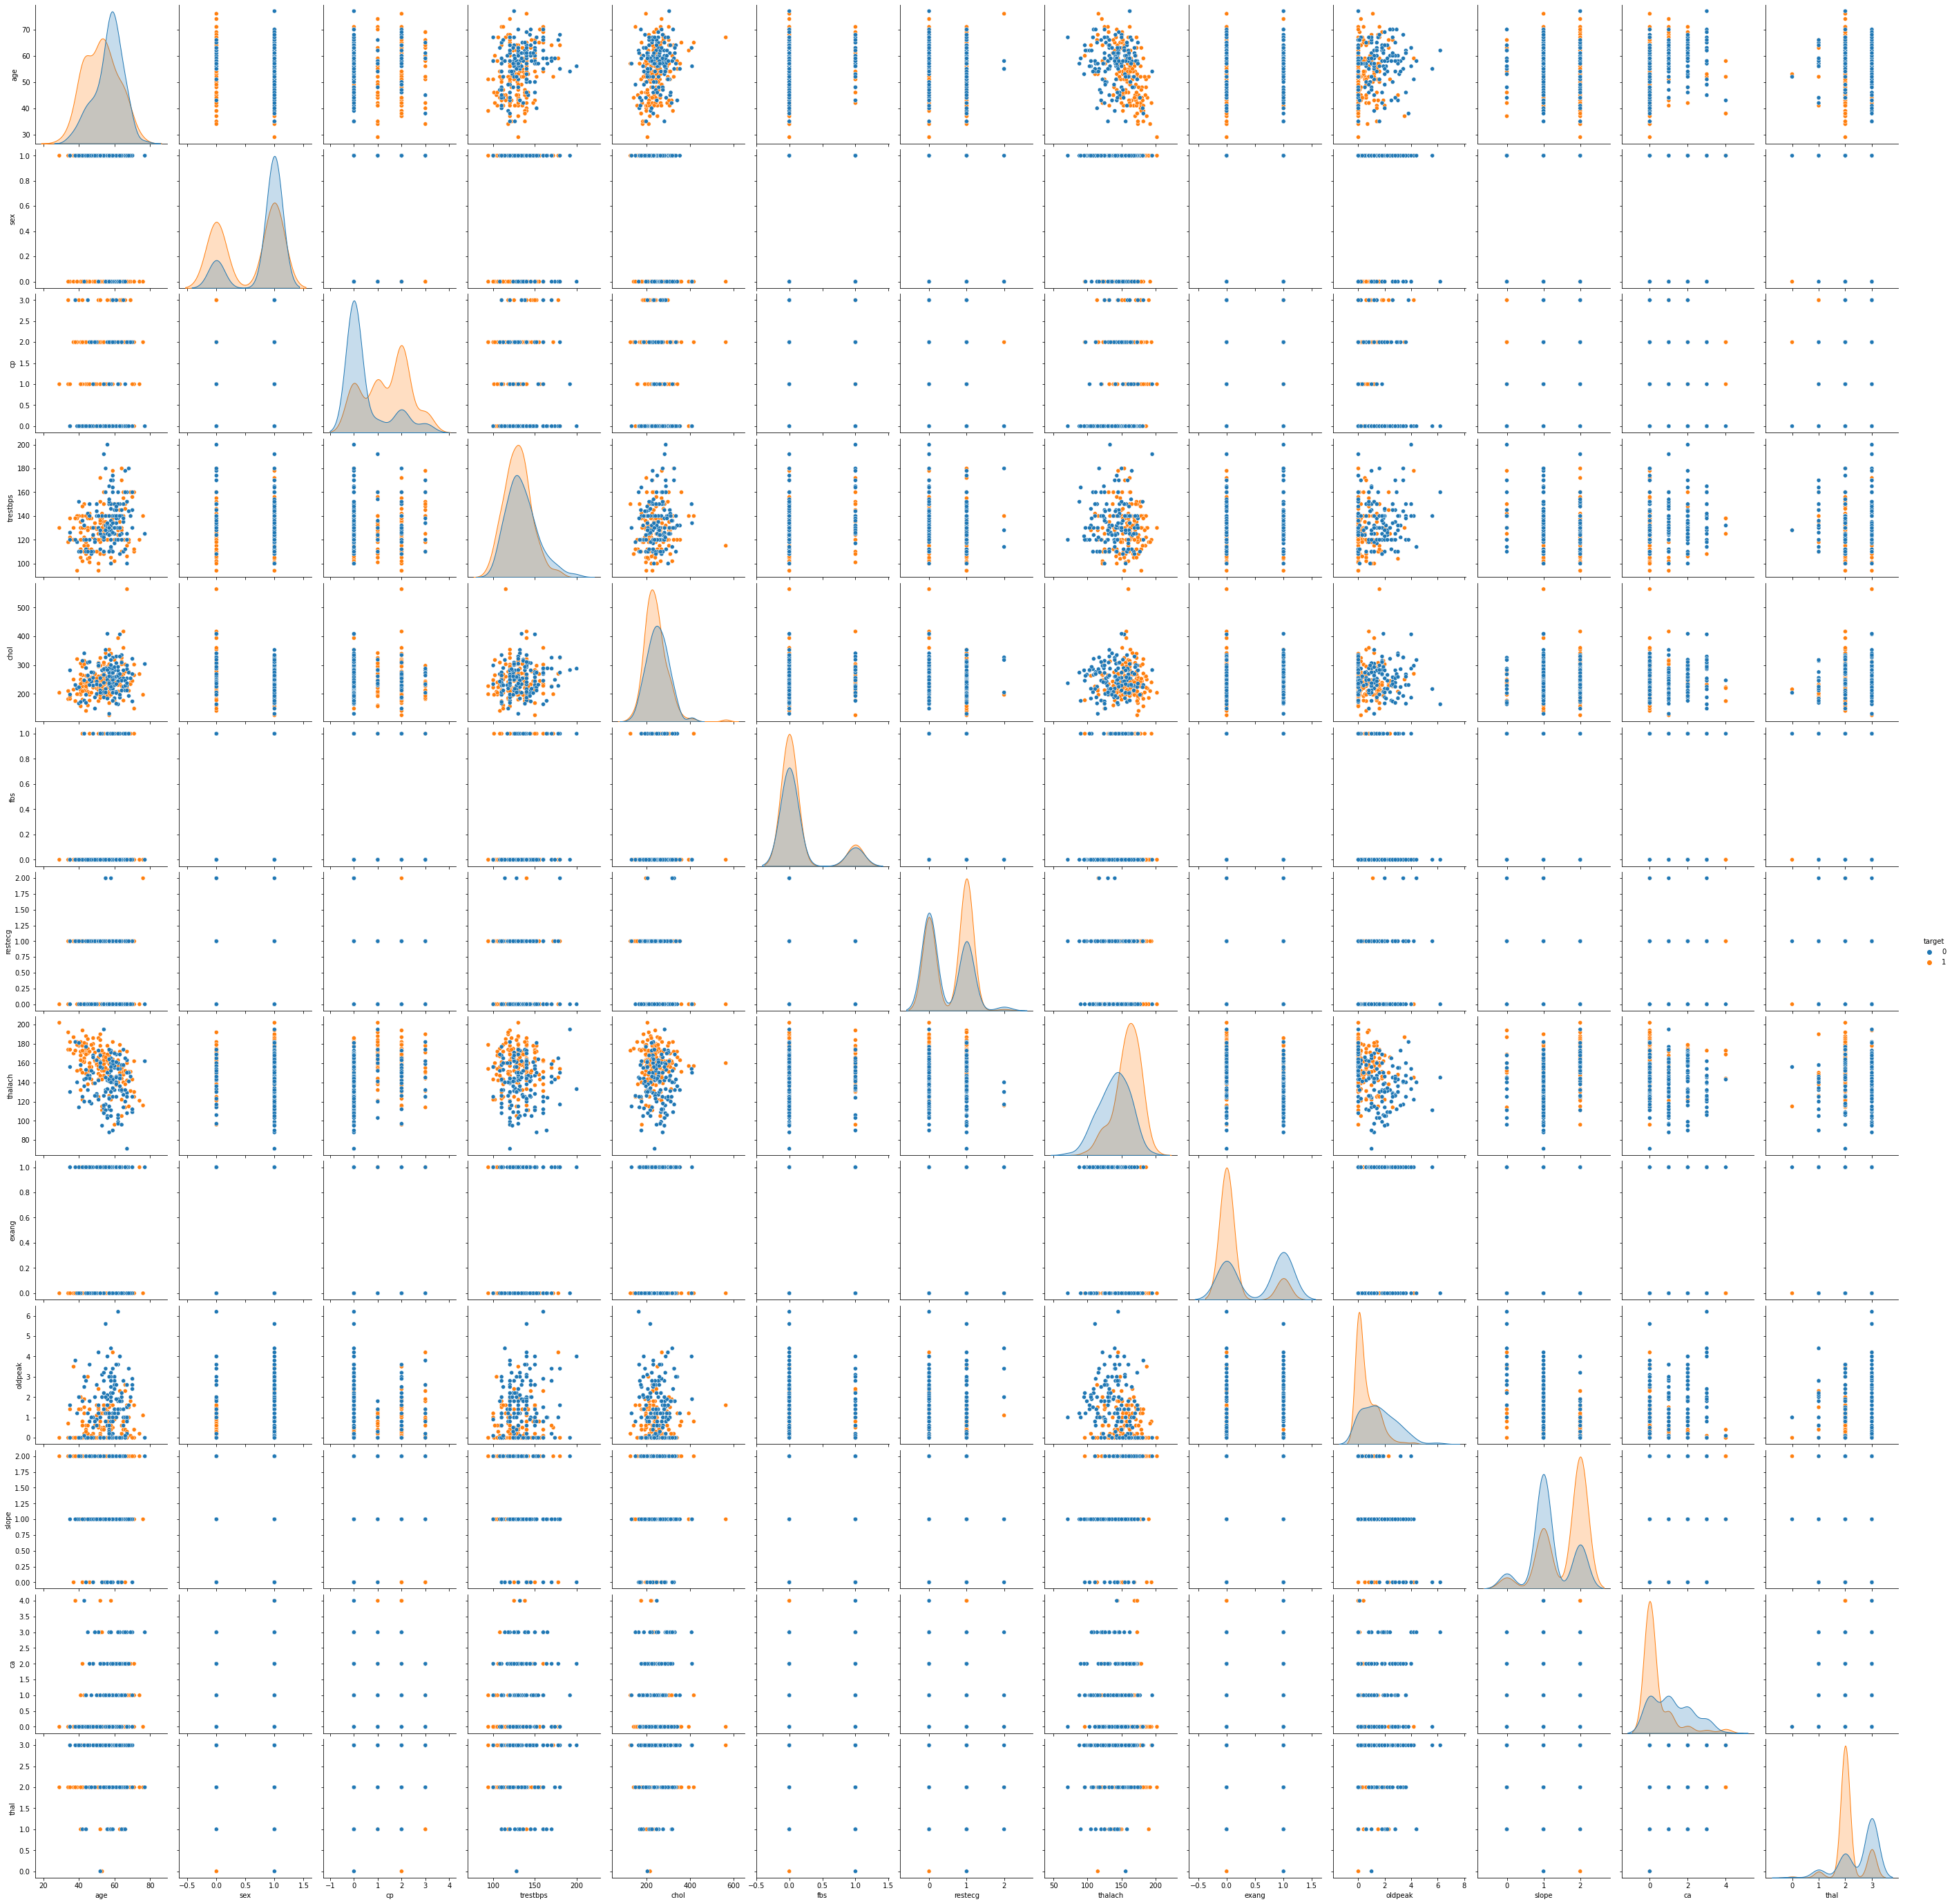

In [21]:
sns.pairplot(dataset,hue="target",height=3,aspect=1)

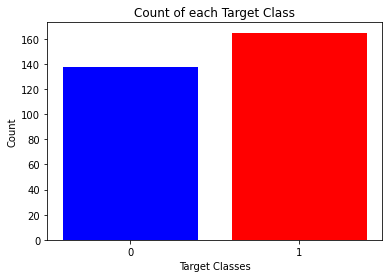

In [22]:
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
plt.show()

### Spliting Data 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.25,random_state = 0)

In [25]:
y_train.shape

(75,)

### Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree_classifier = DecisionTreeClassifier()

In [28]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = tree_classifier.predict(X_test)

In [30]:
df = pd.DataFrame({"actual":y_test,"predicted":y_pred})

In [31]:
df

,actual,predicted
225,0,1
152,1,1
228,0,0
201,0,0
52,1,0
...,...,...
301,0,0
196,0,1
6,1,1
68,1,1


In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<AxesSubplot:>

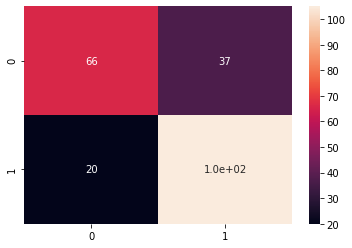

In [33]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       103
           1       0.74      0.84      0.79       125

    accuracy                           0.75       228
   macro avg       0.75      0.74      0.74       228
weighted avg       0.75      0.75      0.75       228



In [35]:
 print(accuracy_score(y_test,y_pred)*100)


75.0


### SVM

In [36]:
from sklearn.svm import SVC

In [37]:
S_classifier = SVC(kernel='rbf')

In [38]:
S_classifier.fit(X_train,y_train)

SVC()

In [40]:
y_pred = S_classifier.predict(X_test)

In [41]:
df = pd.DataFrame({"actual":y_test,"predicted":y_pred})

In [42]:
df

,actual,predicted
225,0,1
152,1,1
228,0,0
201,0,1
52,1,1
...,...,...
301,0,1
196,0,1
6,1,0
68,1,1


<AxesSubplot:>

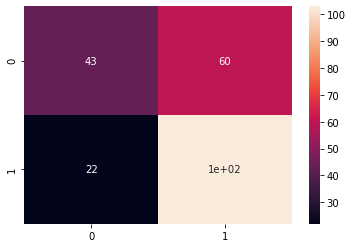

In [43]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [44]:
print(accuracy_score(y_test,y_pred)*100)

64.03508771929825


In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.66      0.51        65
           1       0.82      0.63      0.72       163

    accuracy                           0.64       228
   macro avg       0.62      0.65      0.61       228
weighted avg       0.71      0.64      0.66       228



### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier = RandomForestClassifier()

In [48]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
df = pd.DataFrame({"actual":y_test,"prediced":y_pred})

In [51]:
df

,actual,prediced
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
...,...,...
301,0,0
196,0,1
6,1,1
68,1,1


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       103
           1       0.80      0.86      0.83       125

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



<AxesSubplot:>

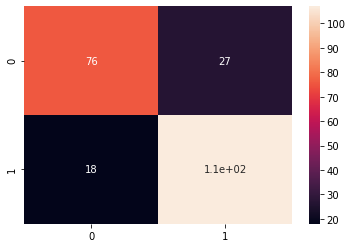

In [53]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [54]:
print(accuracy_score(y_test,y_pred)*100)

80.26315789473685


### Logistic Regrssion

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
Lr = LogisticRegression()

In [57]:
Lr.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = Lr.predict(X_test)

In [59]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [60]:
df

,Actual,Predicted
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
...,...,...
301,0,0
196,0,0
6,1,1
68,1,1


In [61]:
print(accuracy_score(y_test,y_pred)*100)

82.89473684210526


<AxesSubplot:>

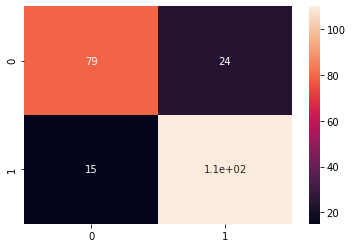

In [62]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

### Comparision of algorithms

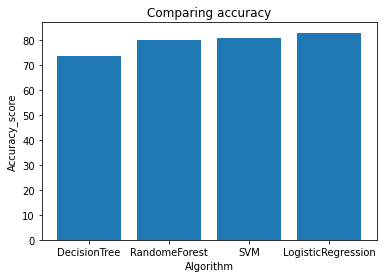

In [63]:

x1=['DecisionTree','RandomeForest','SVM','LogisticRegression']
y1=[73.68,79.82,80.70,82.89]


plt.bar(x1,y1,align="center")

plt.title("Comparing accuracy") 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy_score")
plt.show()

### Save Model

In [64]:
import pickle

In [65]:
#save model
filename = 'model.pkl'
pickle.dump(Lr,open(filename,'wb'))

#load_model
heart_disease_predictor = pickle.load(open(filename,'rb'))

#predict output
y_pred = heart_disease_predictor.predict(X_test)

#confusion_matrix
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred))

#accuracy
print("accuracy_score of Logistic Regression : \n",accuracy_score(y_test,y_pred))

confusion_matrix : 
 [[ 79  24]
 [ 15 110]]
accuracy_score of Logistic Regression : 
 0.8289473684210527
